**FOOD DETECTION USING IMAGEAI (ATTEMPT - 3)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imageai module was downloaded.

In [2]:
!pip3 install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl

Including necessary header files.

In [3]:
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import load_model
from keras.optimizers import SGD
from imageai.Detection import ObjectDetection
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


Reading image file names.

In [4]:
imgs_path=[]
with open("drive//My Drive//food images//images.txt",'r') as f:
  for i in f.readlines():
    imgs_path.append(i[:-1])
print(imgs_path,len(imgs_path))

['1.jpg', '9.jpg', '14.jpg', '19.jpg', '22.jpg', '25.jpg', '27.jpg', '28.jpg', '30.jpg', '31.jpg', '33.jpg', '37.jpg', '38.jpg', '58.jpg', '59.jpg', '61.jpg', '62.jpg', '72.jpg', '81.jpg', '87.jpg', '88.jpg', '89.jpg', '91.jpg', '92.jpg', '97.jpg', '4004.jpg', '4294.jpg', '4300.jpg', '4305.jpg', '4316.jpg', '4323.jpg', '4331.jpg', '4337.jpg', '4520.jpg', '4605.jpg', '4930.jpg', '4931.jpg', '4934.jpg', '4936.jpg', '4938.jpg', '4953.jpg', '4955.jpg', '4956.jpg', '4958.jpg', '4972.jpg', '4985.jpg', '4988.jpg', '5013.jpg', '5044.jpg', '5073.jpg', '5074.jpg', '5075.jpg', '5077.jpg', '5087.jpg', '5101.jpg', '5106.jpg', '5109.jpg', '5115.jpg', '5127.jpg', '5142.jpg', '5149.jpg', '5158.jpg', '5169.jpg', '5170.jpg', '5180.jpg', '5245.jpg', '5512.jpg', '6476.jpg', '6910.jpg', '6974.jpg', '7037.jpg', '7046.jpg', '7054.jpg', '7077.jpg', '7145.jpg', '7263.jpg', '7293.jpg', '7321.jpg', '7337.jpg', '10617.jpg', '10910.jpg', '11064.jpg', '11156.jpg', '11161.jpg', '11167.jpg', '11180.jpg', '11184.jpg',

Reading class names.

In [5]:
class_names=open("drive//My Drive//food images//classes.txt",'r').readlines()
class_names=[class_names[i][:-1] for i in range(len(class_names))]
print(class_names)
print(len(class_names))

['rice', 'eels', 'pilaf', "chicken-'n'-egg", 'pork', 'beef', 'sushi', 'chicken', 'fried', 'tempura', 'bibimbap', 'toast', 'croissant', 'roll', 'raisin', 'chip', 'hamburger', 'pizza', 'sandwiches', 'udon', 'tempura', 'soba', 'ramen', 'beef', 'tensin', 'fried', 'spaghetti', 'Japanese-style', 'takoyaki', 'gratin', 'sauteed', 'croquette', 'grilled', 'sauteed', 'vegetable', 'miso', 'potage', 'sausage', 'oden', 'omelet', 'ganmodoki', 'jiaozi', 'stew', 'teriyaki', 'fried', 'grilled', 'salmon', 'sashimi', 'grilled', 'sukiyaki', 'sweet', 'lightly', 'steamed', 'tempura', 'fried', 'sirloin', 'nanbanzuke', 'boiled', 'seasoned', 'hambarg', 'beef', 'dried', 'ginger', 'spicy', 'yakitori', 'cabbage', 'rolled', 'egg', 'fermented', 'cold', 'egg', 'chilled', 'stir-fried', 'simmered', 'boiled', 'sashimi', 'sushi', 'fish-shaped', 'shrimp', 'roast', 'steamed', 'omelet', 'cutlet', 'spaghetti', 'fried', 'potato', 'green', 'macaroni', 'Japanese', 'pork', 'chinese', 'beef', 'kinpira-style', 'rice', 'pizza', 'di

Reading the image path names.

In [6]:
imgs=[]
for i in imgs_path:
  print(i)
  imgs.append("drive//My Drive//food images//"+i)
#imgs=np.array(imgs)
#print(imgs.shape)

1.jpg
9.jpg
14.jpg
19.jpg
22.jpg
25.jpg
27.jpg
28.jpg
30.jpg
31.jpg
33.jpg
37.jpg
38.jpg
58.jpg
59.jpg
61.jpg
62.jpg
72.jpg
81.jpg
87.jpg
88.jpg
89.jpg
91.jpg
92.jpg
97.jpg
4004.jpg
4294.jpg
4300.jpg
4305.jpg
4316.jpg
4323.jpg
4331.jpg
4337.jpg
4520.jpg
4605.jpg
4930.jpg
4931.jpg
4934.jpg
4936.jpg
4938.jpg
4953.jpg
4955.jpg
4956.jpg
4958.jpg
4972.jpg
4985.jpg
4988.jpg
5013.jpg
5044.jpg
5073.jpg
5074.jpg
5075.jpg
5077.jpg
5087.jpg
5101.jpg
5106.jpg
5109.jpg
5115.jpg
5127.jpg
5142.jpg
5149.jpg
5158.jpg
5169.jpg
5170.jpg
5180.jpg
5245.jpg
5512.jpg
6476.jpg
6910.jpg
6974.jpg
7037.jpg
7046.jpg
7054.jpg
7077.jpg
7145.jpg
7263.jpg
7293.jpg
7321.jpg
7337.jpg
10617.jpg
10910.jpg
11064.jpg
11156.jpg
11161.jpg
11167.jpg
11180.jpg
11184.jpg
11186.jpg
11197.jpg
11200.jpg
11292.jpg
11317.jpg
11326.jpg
11337.jpg
11352.jpg
11459.jpg
11568.jpg
11573.jpg
11575.jpg
11576.jpg
11577.jpg
11590.jpg
11593.jpg
11597.jpg
11608.jpg
11649.jpg
11650.jpg
11686.jpg
11689.jpg
11694.jpg
11732.jpg
11737.jpg
11774.jpg
1

Reading the boudning box information of each image.

In [7]:
bb=[]
with open("drive//My Drive//food images//bb_inf.txt",'r') as f:
  for i in f.readlines():
    print(eval(i)[0])
    bb.append(eval(i))

1
9
14
19
22
25
27
28
30
31
33
37
38
58
59
61
62
72
81
87
88
89
91
92
97
4004
4294
4300
4305
4316
4323
4331
4337
4520
4605
4930
4931
4934
4936
4938
4953
4955
4956
4958
4972
4985
4988
5013
5044
5073
5074
5075
5077
5087
5101
5106
5109
5115
5127
5142
5149
5158
5169
5170
5180
5245
5512
6476
6910
6974
7037
7046
7054
7077
7145
7263
7293
7321
7337
10617
10910
11064
11156
11161
11167
11180
11184
11186
11197
11200
11292
11317
11326
11337
11352
11459
11568
11573
11575
11576
11577
11590
11593
11597
11608
11649
11650
11686
11689
11694
11732
11737
11774
11862
11956
11962
11990
11997
12079
12081
12082
12084
12086
12095
12098
12108
12169
12171
12184
12209
12245
12923
13164
13182
13233
13236
13262
13264
13273
13276
13295
13297
13325
13327
13329
13331
13333
13379
13389
13414
13468
13639
13645
13646
13671
13690
13693
13695
13696
13701
13702
13704
13705
13708
13723
13724
13731
13732
13733
13734
13735
13736
13739
13745
13746
13747
13748
13749
13752
13754
13755
13757
13763
13764
13774
13775
13776
13779
137

Defining a function to plot the image with its bounding box.

In [0]:
def plot_bb(img, box):
  fig,ax=plt.subplots(1)
  ax.imshow(img)
  for b in box:
    x=b[1]-b[3]/2
    x/=800
    x*=512
    y=b[2]-b[4]/2
    y/=600
    y*=512
    lab=class_names[int(b[0])-1]
    w=b[3]*512/800
    h=b[4]*512/600
    bb=patches.Rectangle((x,y),w,h,edgecolor='b',fill=False,facecolor=None)
    ax.add_patch(bb)
    plt.text(x,y,lab,fontsize=15,color='b')
  plt.show()

Plotting sample images.

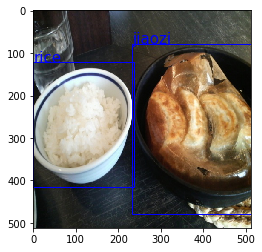

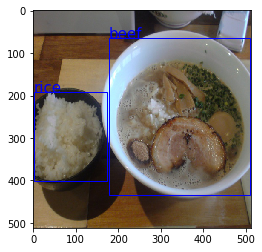

In [9]:
plot_bb(plt.imread(imgs[0]),bb[0][1])
plot_bb(plt.imread(imgs[1]),bb[1][1])

The idea behind this attempt was that, to use a pretrained **YOLO** model to detect objects similar to food containers (bowls, cups, plates etc.) and there by also detecting the food also.
These objects are then extracted from these images, resized and fed to a simple **CNN** for performing classification.

Using the inbuilt **YOLO** model for detecting objects.

In [10]:
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("drive//My Drive//yolo.h5")
detector.loadModel()
#custom = detector.CustomObjects(bottle=True,cup=True,bowl=True,banana=True,apple=True,sandwich=True,orange=True,broccoli=True,carrot=True,pizza=True,donot=True,cake=True)

rt_img,detections,objs = detector.detectObjectsFromImage(input_image=imgs[0], output_type="array", extract_detected_objects=True, minimum_percentage_probability=30)

W0722 14:30:29.706494 139852693211008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0722 14:30:29.711932 139852693211008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0722 14:30:29.713510 139852693211008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0722 14:30:29.925905 139852693211008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0722 14:30:29.928545 139852693211008 

Plotting a sample of the **YOLO** model output.

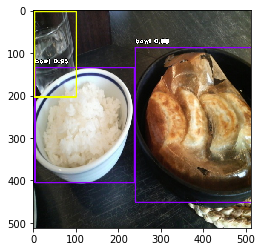

In [11]:
plt.imshow(rt_img)

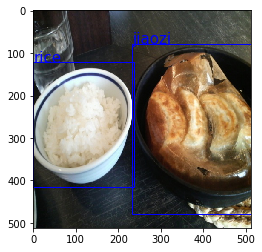

In [12]:
plot_bb(plt.imread(imgs[0]),bb[0][1])

In [13]:
print(detections)

[{'name': 'bowl', 'percentage_probability': 87.87447214126587, 'box_points': (240, 88, 512, 451)}, {'name': 'bowl', 'percentage_probability': 94.92149353027344, 'box_points': (4, 135, 238, 405)}, {'name': 'cup', 'percentage_probability': 95.85585594177246, 'box_points': (3, 3, 101, 204)}]


In [14]:
print(bb[0])

['1', [['1', 185.0, 314.5, 370, 343], ['42', 581.5, 325.5, 437, 469]]]


The bounding boxes predicted by the model are choosen based on a threshold value.

In [15]:
data=[]
gt=[]
sav_img={}
boxes=[]
c=0
thres=150
for i in range(len(imgs)):
    rt_img,detections,objs = detector.detectObjectsFromImage(input_image=imgs[i], output_type="array", extract_detected_objects=True, minimum_percentage_probability=30)
    x=[]
    y=[]
    bbox=[]
    for j in range(len(bb[i][1])):
      b=bb[i][1][j]
      x1=(b[1]-b[3]/2)*512/800
      y1=(b[2]-b[4]/2)*512/600
      x2=(b[1]+b[3]/2)*512/800
      y2=(b[2]+b[4]/2)*512/600
      for k in range(len(detections)):
        box=detections[k]["box_points"]
        l=abs(x1-box[0])+abs(y1-box[1])+abs(x2-box[2])+abs(y2-box[3])
        if l<thres:
          x.append(objs[k])
          y.append(int(bb[i][1][j][0])-1)
          bbox.append(detections[k]["box_points"])
          print("added")
          break
    print(i)
    if len(x)>0:
      data.extend(x)
      gt.extend(y)
      boxes.extend(bbox)
      sav_img[bb[i][0]]=len(x)
      c+=1
    if c>=500:
      break

added
added
0
added
added
1
added
added
2
3
4
5
6
added
7
8
9
added
10
11
added
12
13
14
15
16
added
added
17
18
19
added
added
20
added
added
21
added
added
22
added
added
23
added
added
24
added
25
26
27
28
29
30
added
31
added
added
32
33
34
added
added
35
36
37
38
39
40
41
42
added
43
44
added
45
added
added
46
47
48
49
50
51
added
52
53
added
added
54
55
56
added
57
58
59
60
61
added
62
63
64
added
65
66
added
67
68
69
70
added
71
added
added
72
73
added
added
74
added
75
added
76
77
78
79
added
80
81
added
added
82
added
added
83
84
85
86
87
88
89
90
91
added
92
93
94
95
added
96
97
98
99
100
added
101
102
103
added
104
added
added
added
added
105
106
added
107
added
added
108
added
added
109
110
111
added
added
112
added
added
113
114
added
115
116
117
added
added
118
added
added
119
added
added
added
120
added
added
121
added
added
122
added
123
added
124
125
126
added
added
127
added
128
129
130
131
132
133
134
135
136
137
added
138
139
140
141
142
143
144
added
145
146
added


In [16]:
print(len(data))
print(len(gt))
print(gt)
print(sav_img)
print(boxes)

524
524
[0, 41, 0, 23, 0, 35, 0, 59, 68, 0, 35, 0, 39, 0, 35, 0, 35, 0, 88, 0, 86, 0, 35, 43, 58, 0, 69, 35, 48, 0, 35, 49, 0, 90, 90, 0, 0, 0, 67, 0, 35, 0, 35, 0, 85, 0, 41, 69, 41, 69, 97, 0, 97, 90, 0, 35, 35, 45, 22, 0, 35, 0, 35, 0, 35, 0, 86, 0, 0, 88, 0, 88, 0, 29, 88, 0, 88, 0, 88, 54, 88, 0, 89, 0, 68, 0, 0, 44, 47, 0, 35, 44, 0, 35, 0, 0, 35, 0, 35, 0, 69, 35, 35, 0, 35, 0, 35, 0, 35, 0, 35, 0, 35, 0, 35, 35, 35, 35, 68, 0, 0, 0, 35, 35, 86, 35, 0, 35, 69, 0, 35, 86, 0, 22, 0, 68, 86, 0, 90, 0, 0, 19, 86, 0, 0, 22, 0, 35, 0, 22, 0, 0, 35, 37, 54, 86, 0, 69, 0, 35, 69, 0, 22, 0, 30, 35, 69, 35, 0, 35, 69, 0, 22, 41, 0, 35, 86, 30, 0, 35, 0, 35, 35, 0, 0, 0, 0, 35, 86, 0, 35, 86, 0, 86, 0, 35, 86, 0, 0, 53, 68, 0, 35, 0, 35, 0, 99, 0, 0, 86, 86, 53, 0, 0, 0, 35, 55, 0, 0, 38, 68, 0, 35, 35, 0, 35, 0, 35, 86, 0, 35, 0, 35, 0, 35, 0, 53, 0, 35, 35, 0, 35, 75, 0, 35, 0, 35, 0, 35, 35, 0, 0, 92, 0, 97, 0, 0, 35, 35, 0, 86, 90, 35, 0, 35, 35, 0, 35, 35, 35, 35, 0, 35, 35, 63, 35, 7

Data is resized and split into train and test sets.

In [0]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]
bb_train=[]
bb_test=[]
for i in range(len(data)):
  im=cv2.resize(data[i],(128,128),interpolation = cv2.INTER_AREA)
  y1=np.zeros(100)
  y1[gt[i]]=1
  if i%5==0:
    X_test.append(im)
    y_test.append(y1)
    bb_test.append(boxes[i])
  else:
    X_train.append(im)
    y_train.append(y1)
    bb_train.append(boxes[i])

Train and test data are converted into numpy array.

In [18]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(419, 128, 128, 3)
(419, 100)
(105, 128, 128, 3)
(105, 100)


A **CNN** was built to classify the objects detected from the pretrained **YOLO** model.

In [19]:
classifier = Sequential()

classifier.add(Conv2D(128, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (4, 4)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 100, activation = 'sigmoid'))

classifier.summary()

W0722 14:33:29.707643 139852693211008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
batch_normalization_73 (Batc (None, 126, 126, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 29, 29, 64)        73792     
_________________________________________________________________
batch_normalization_74 (Batc (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 12, 12, 32)        18464     
__________

The classifier was trained and validated using **Adam** optimizer for 50 epochs and batch size of 16.

In [20]:
#opt = SGD(lr=0.01, momentum=0.9)
classifier.compile(optimizer ='adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])

his=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=16)

W0722 14:33:29.995562 139852693211008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Train on 419 samples, validate on 105 samples
Epoch 1/50
419/419 [==============================] - 4s 10ms/step - loss: 3.8628 - acc: 0.3389 - val_loss: 3.6339 - val_acc: 0.4762
Epoch 2/50
419/419 [==============================] - 2s 4ms/step - loss: 2.4911 - acc: 0.3866 - val_loss: 3.1120 - val_acc: 0.4381
Epoch 3/50
419/419 [==============================] - 2s 4ms/step - loss: 1.7746 - acc: 0.4153 - val_loss: 2.9578 - val_acc: 0.5048
Epoch 4/50
419/419 [==============================] - 2s 4ms/step - loss: 1.3540 - acc: 0.5322 - val_loss: 2.9524 - val_acc: 0.5238
Epoch 5/50
419/419 [==============================] - 2s 4ms/step - loss: 0.8446 - acc: 0.6730 - val_loss: 3.2717 - val_acc: 0.4857
Epoch 6/50
419/419 [==============================] - 2s 4ms/step - loss: 0.5577 - acc: 0.8091 - val_loss: 4.1687 - val_acc: 0.4857
Epoch 7/50
419/419 [==============================] - 1s 4ms/step - loss: 0.5262 - acc: 0.8282 - val_loss: 3.3285 - val_acc: 0.5524
Epoch 8/50
419/419 [=========

A function to detect and classify food objects (test).

In [0]:
def predict_food(img_path):
  custom = detector.CustomObjects(bottle=True,bowl=True,banana=True,apple=True,sandwich=True,broccoli=True,carrot=True,pizza=True,donot=True,cake=True)
  rt_img,detections,objs = detector.detectCustomObjectsFromImage(custom_objects=custom,input_image=img_path, output_type="array", extract_detected_objects=True, minimum_percentage_probability=30)
  x_test=[]
  for i in objs:
    x_test.append(cv2.resize(i,(128,128),interpolation = cv2.INTER_AREA))
  x_test=np.array(x_test)
  pred_lab=classifier.predict(x_test)
  lab=[class_names[np.argmax(pred_lab[i])] for i in range(len(pred_lab))]
  box=[list(detections[i]["box_points"]) for i in range(len(detections))]
  fig,ax=plt.subplots(1)
  ax.imshow(plt.imread(img_path))
  for i in range(len(lab)):
    bb1=patches.Rectangle((box[i][0],box[i][1]),box[i][2]-box[i][0],box[i][3]-box[i][1],edgecolor='b',fill=False)
    ax.add_patch(bb1)
    plt.text(box[i][0],box[i][1],lab[i],fontsize=15,color='b')
  plt.show()

Five sample images are chosen and are predicted.

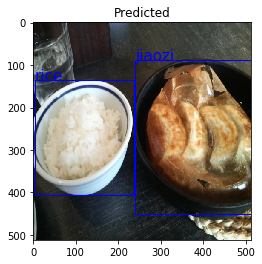

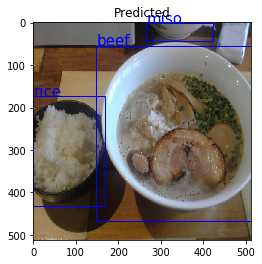

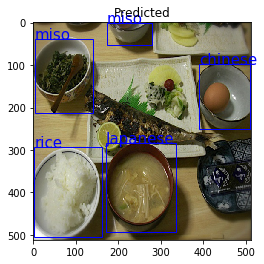

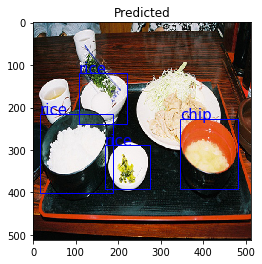

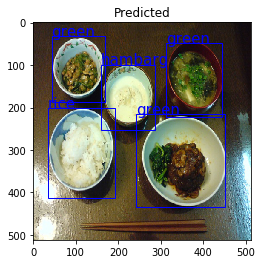

In [22]:
test_img=['1.jpg','9.jpg','14.jpg','28.jpg','33.jpg']
for i in test_img:
  predict_food(img_path="drive//My Drive//food images//"+i)

This attempt worked successfully even though it was with the assumption of food being kept in containers.
The classification model provided a validation/test accuracy of nearly 60%.